In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler

import warnings                         
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
def print_metrics(y_test,y_pred):
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [3]:
def plotModelResults(model, X_train, X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(7, 3))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(7, 4))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
data = pd.read_csv('dow_jones_index.data', index_col='date')
data.index=pd.to_datetime(data.index)
data.high=data.high.apply(lambda x: float(x[1:]))

In [5]:
data.head()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-01-07,1,AA,$15.82,16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
2011-01-14,1,AA,$16.71,16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2011-01-21,1,AA,$16.19,16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
2011-01-28,1,AA,$15.87,16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
2011-02-04,1,AA,$16.18,17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [6]:
stocks = {}
for stock in data.stock.unique():
    stocks[stock] = data[data.stock == stock][['high','volume', 'percent_return_next_dividend']].copy()

In [7]:
for stock in stocks.keys():
    for i in range(4, 13):
        stocks[stock][f"lag_{i}"] = stocks[stock].high.shift(i)
    stocks[stock] = stocks[stock].dropna()

In [8]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index-1]
    y_train = y.iloc[:test_index-1]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test


Для акции: AA


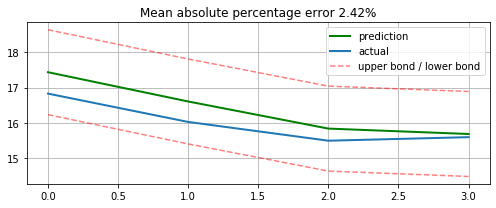

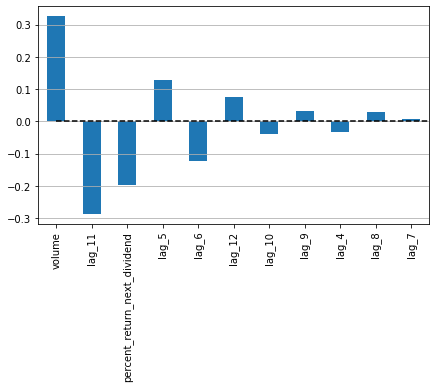


Для акции: AXP


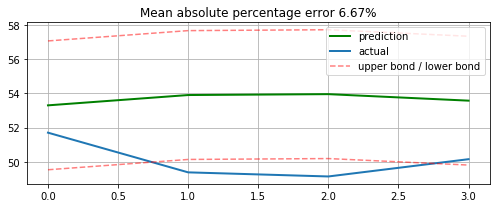

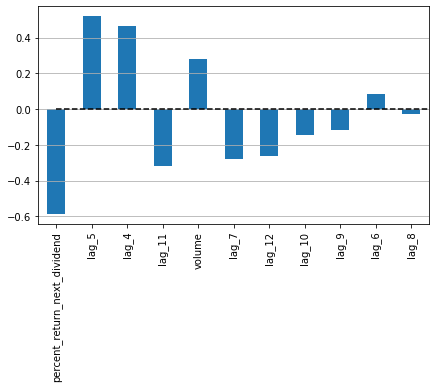


Для акции: BA


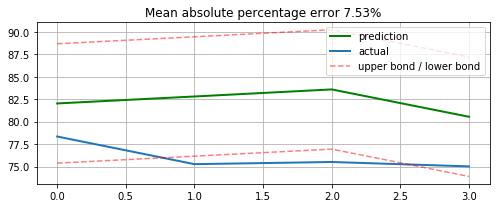

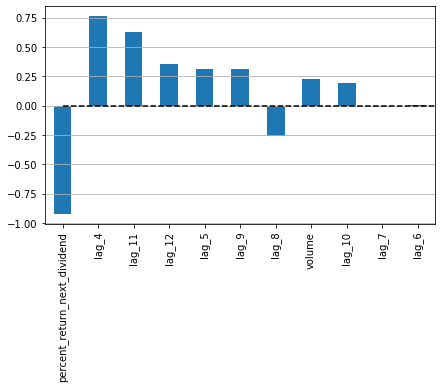


Для акции: BAC


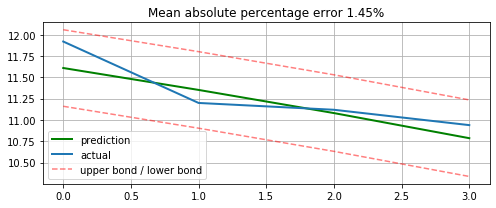

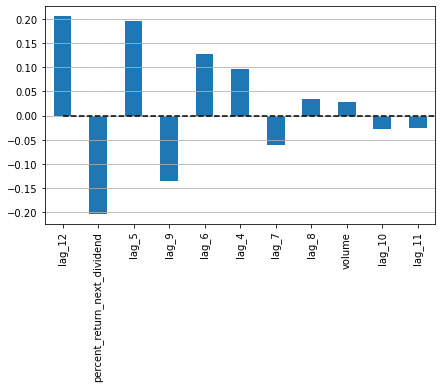


Для акции: CAT


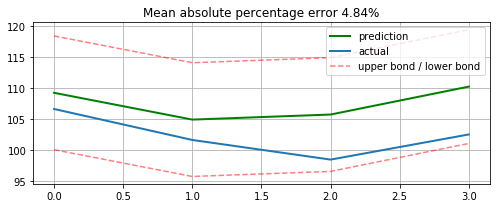

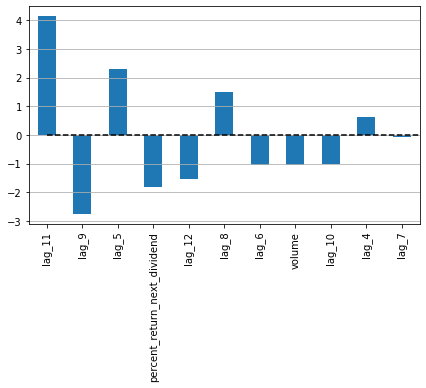


Для акции: CSCO


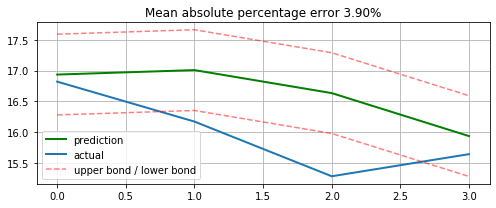

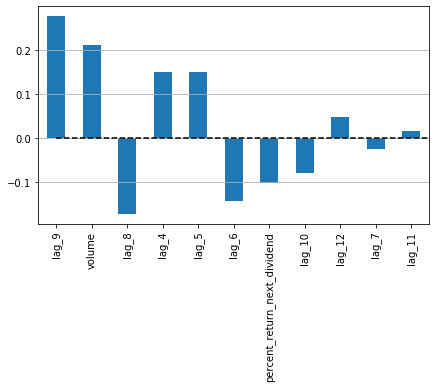


Для акции: CVX


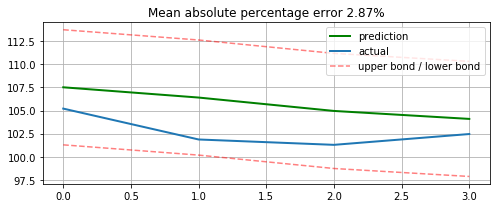

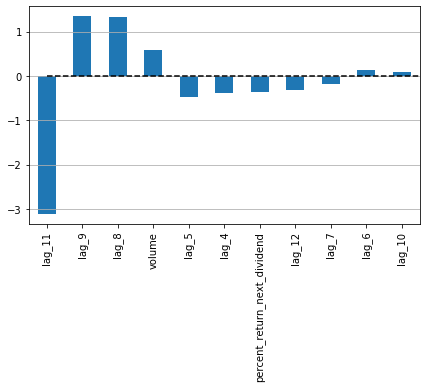


Для акции: DD


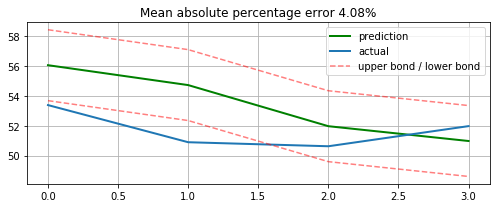

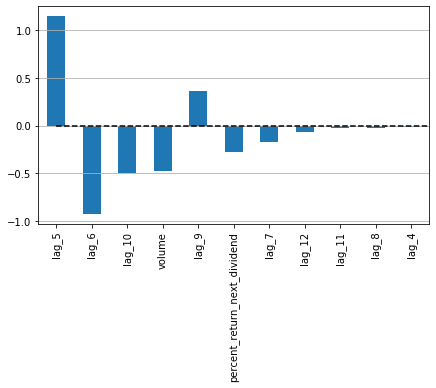


Для акции: DIS


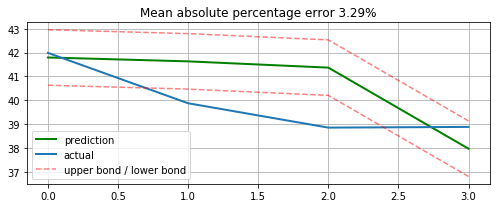

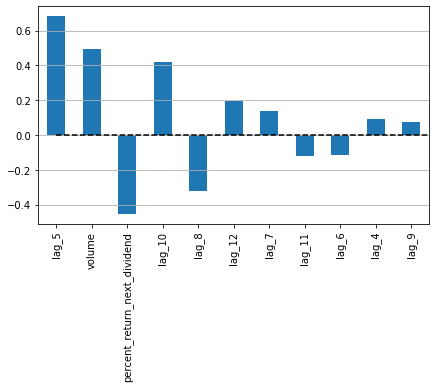


Для акции: GE


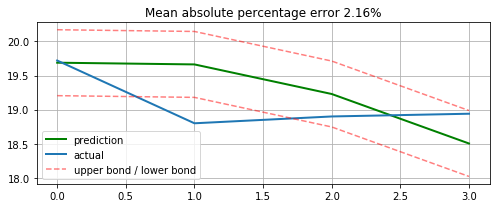

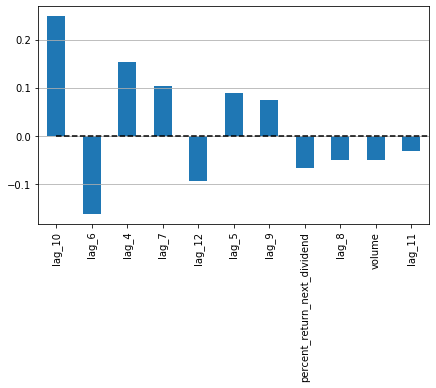


Для акции: HD


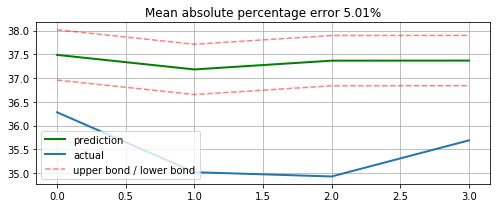

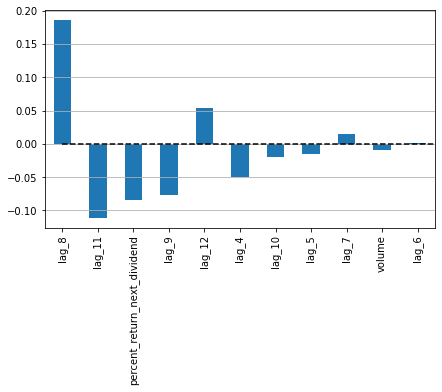


Для акции: HPQ


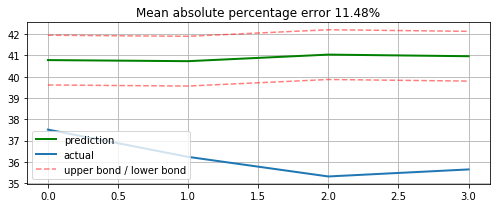

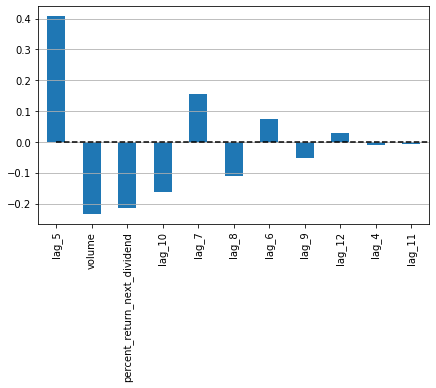


Для акции: IBM


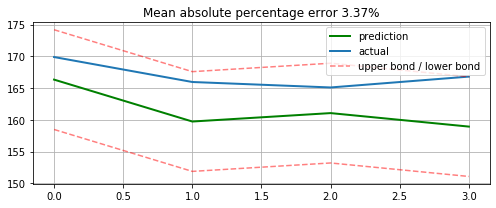

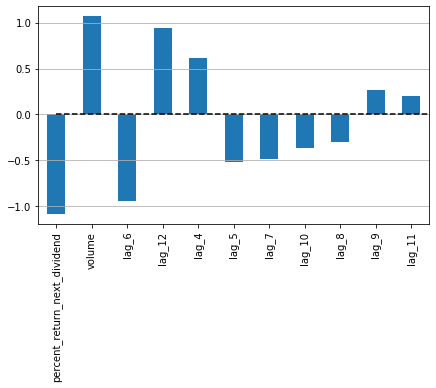


Для акции: INTC


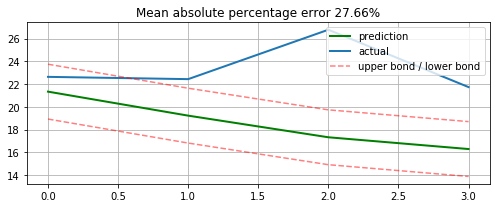

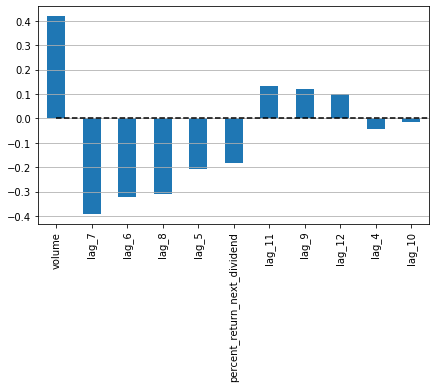


Для акции: JNJ


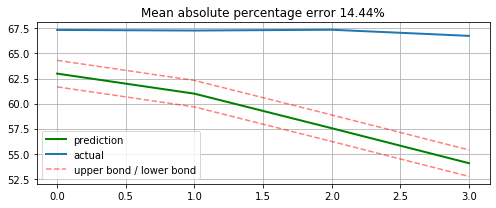

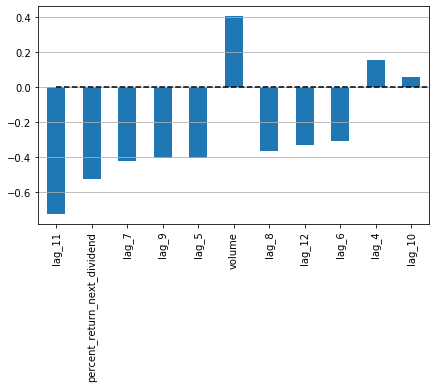


Для акции: JPM


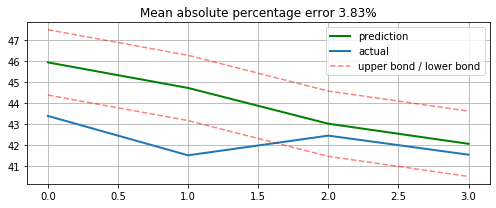

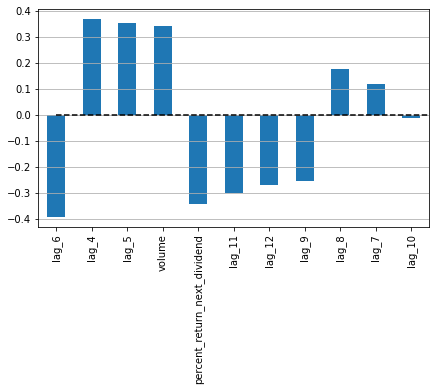


Для акции: KRFT


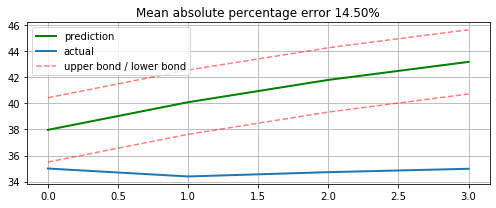

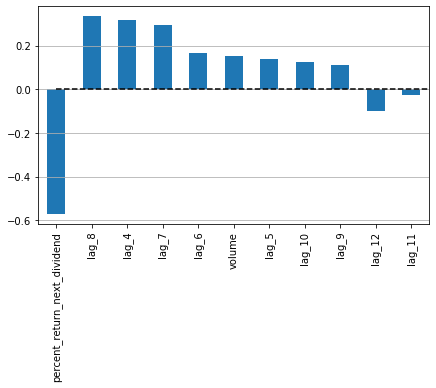


Для акции: KO


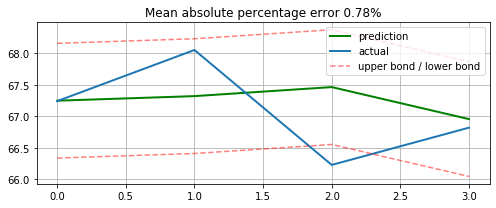

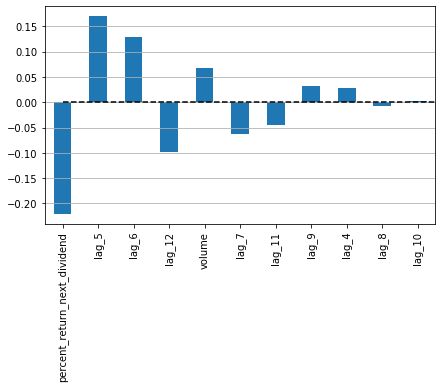


Для акции: MCD


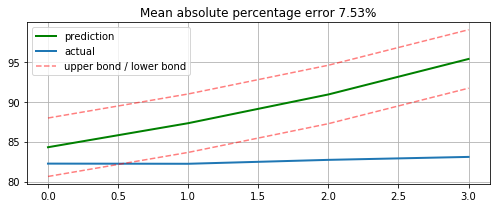

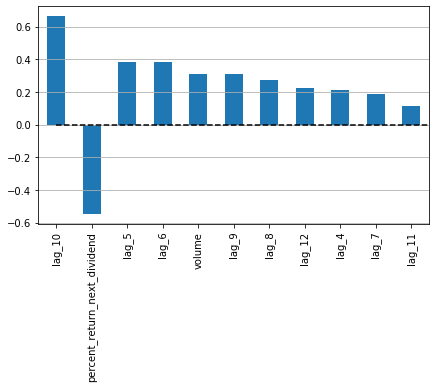


Для акции: MMM


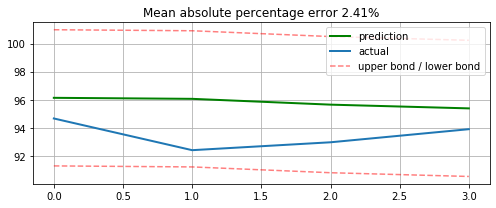

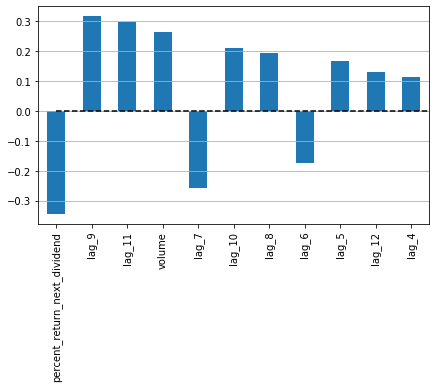


Для акции: MRK


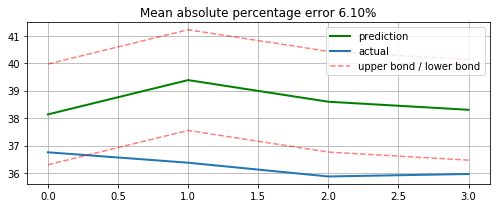

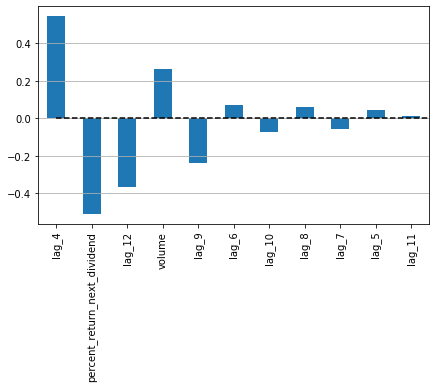


Для акции: MSFT


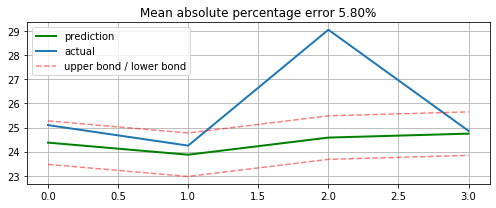

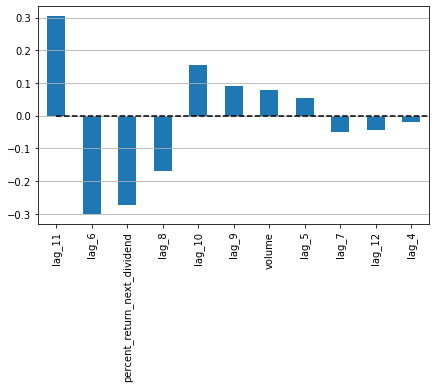


Для акции: PFE


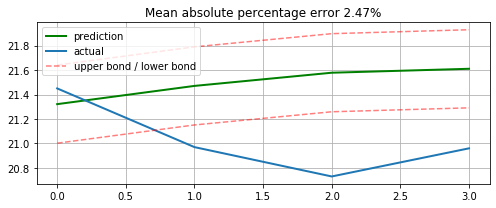

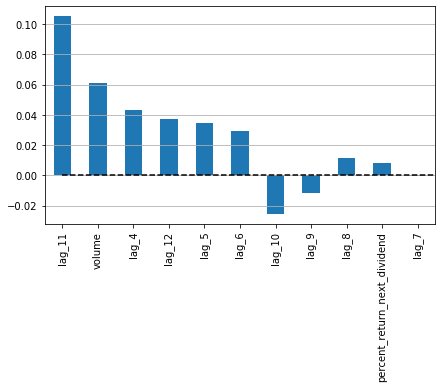


Для акции: PG


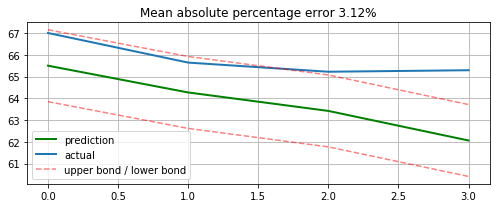

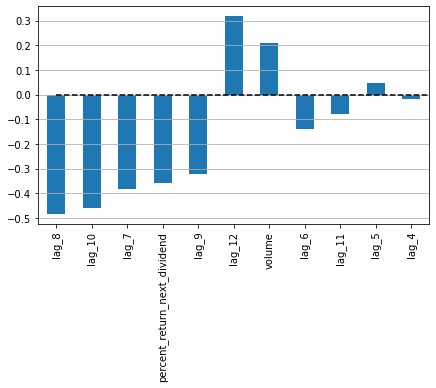


Для акции: T


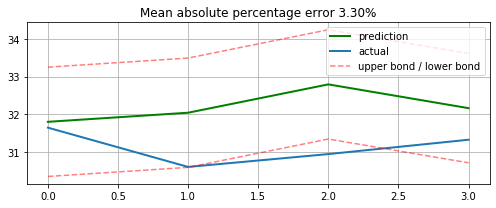

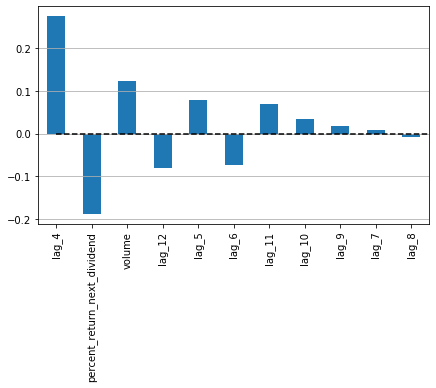


Для акции: TRV


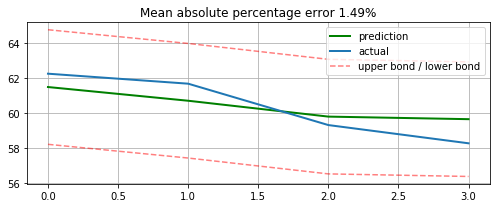

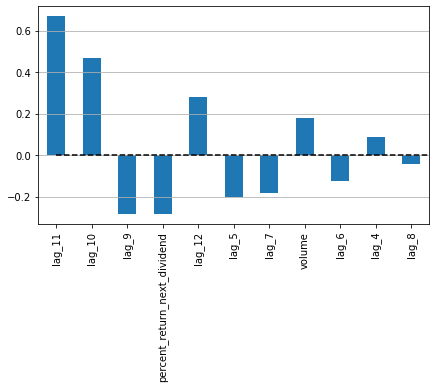


Для акции: UTX


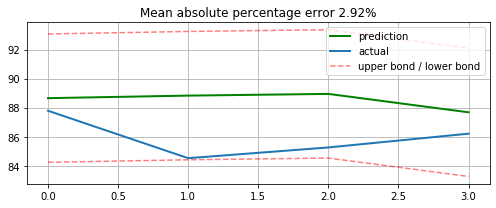

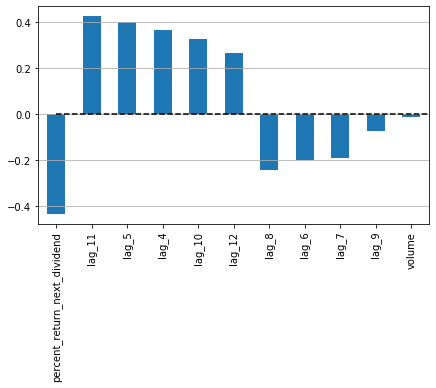


Для акции: VZ


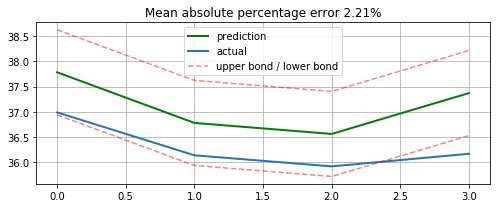

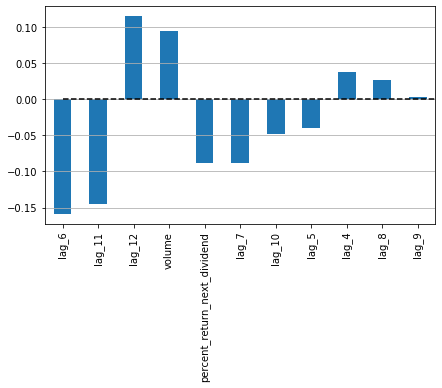


Для акции: WMT


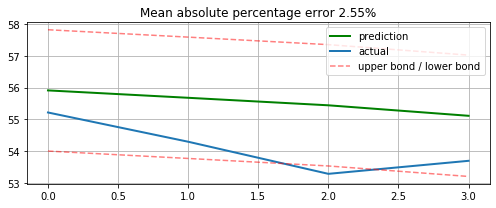

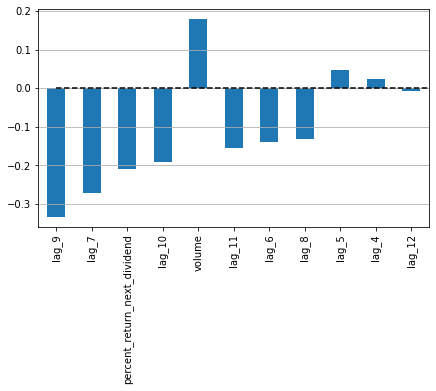


Для акции: XOM


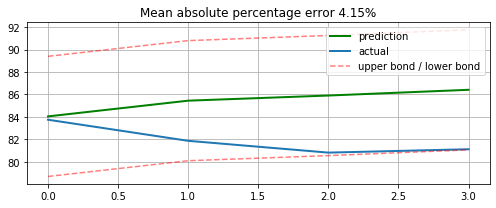

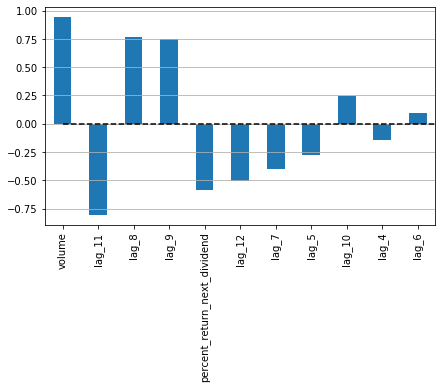

In [9]:

tscv = TimeSeriesSplit(n_splits=2)

for stock in stocks.keys():
    print(f"\nДля акции: {stock}")
    
    X_train, X_test, y_train, y_test = timeseries_train_test_split(
        stocks[stock].drop(columns=['high']),
        stocks[stock]['high'],
        test_size=0.3
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    
    #print_metrics(y_test, lr.predict(X_test_scaled))
    plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
    plotCoefficients(lr)
    plt.show()
    